<a href="https://colab.research.google.com/github/mghildi/Ad_Ease_Time_Series_forecasting/blob/main/adease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
!gdown 11fk4Op2ey2r3Wdydgk-NhrNs5aJVDzy2

Downloading...
From (original): https://drive.google.com/uc?id=11fk4Op2ey2r3Wdydgk-NhrNs5aJVDzy2
From (redirected): https://drive.google.com/uc?id=11fk4Op2ey2r3Wdydgk-NhrNs5aJVDzy2&confirm=t&uuid=04b2e22f-6ece-44ad-9dbf-d66132663e0d
To: /content/train_1 (1).csv
100% 278M/278M [00:10<00:00, 27.0MB/s]


In [3]:
df = pd.read_csv("/content/train_1 (1).csv")

In [ ]:
#read the CSV file
df = pd.read_csv("C:\\Users\\ghild\\Downloads\\train_1.csv")
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [ ]:
#read exogenous variable and store it in exoh
exog = pd.read_csv("C:\\Users\\ghild\\OneDrive\Desktop\\Exog_Campaign_eng.csv")

In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

# Problem Statement - Currently, we lack a method to accurately forecast and optimize the placement of advertisements for our clients.

# Task which needs to be done

Checking null values- We can replace null values with zero as finally we have to do sum aggregation based on language and date

We need to split the Page column and extract language from it

Converting the data to a format that can be fed to the Arima model (Pivoting etc)

In [ ]:
#As we have to finally do the aggrgation in terms of language we can replace null by zero
df.fillna(0,inplace=True)
df.isnull().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

In [ ]:
#Import regular expression to extract language
import re

In [ ]:
def extract_language(row):
    match = re.search(r'_(\w{2})\.wik', row)



    if match:
        return match.group(1)
    else:
        return None

# Apply the function to each row to extract the language
df['Language'] = df['Page'].apply(extract_language)

In [ ]:
df['Language'].value_counts()

en    24111
ja    20431
de    18547
fr    17802
zh    17229
ru    15022
es    14069
Name: Language, dtype: int64

In [ ]:
date_columns = df.iloc[:,1:-1]


In [ ]:
#lets make dates as column to fit timeseries and group it by date and language
df = pd.melt(df, id_vars=['Language'], value_vars=date_columns, var_name='Date', value_name='Value')


In [ ]:

result_df = df.pivot_table(index=['Language', 'Date'], values='Value', aggfunc='sum')

In [ ]:
result_df.tail()

Value
Language Date                 
zh       2016-12-27  6478442.0
         2016-12-28  6513400.0
         2016-12-29  6042545.0
         2016-12-30  6111203.0
         2016-12-31  6298565.0

In [ ]:

df_en = result_df.loc['en']

In [ ]:
#so there is no null values available now
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   550 non-null    float64
dtypes: float64(1)
memory usage: 8.6+ KB


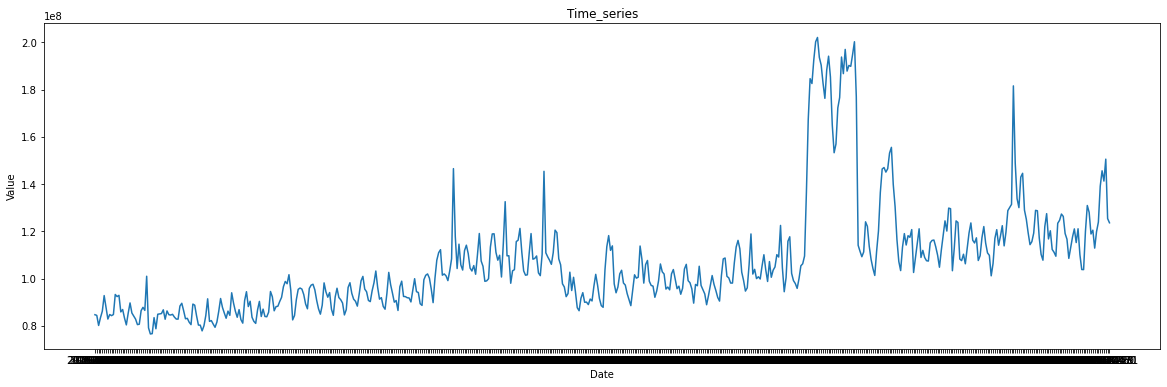

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(df_en.index, df_en['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time_series')
plt.show()

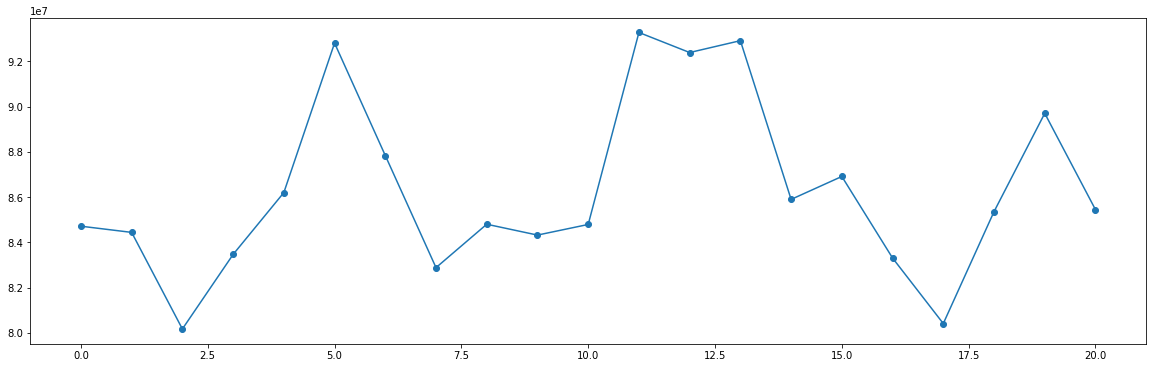

In [ ]:
plt.plot(range(21),df_en['Value'][:21], '-o')

plt.show()

[]

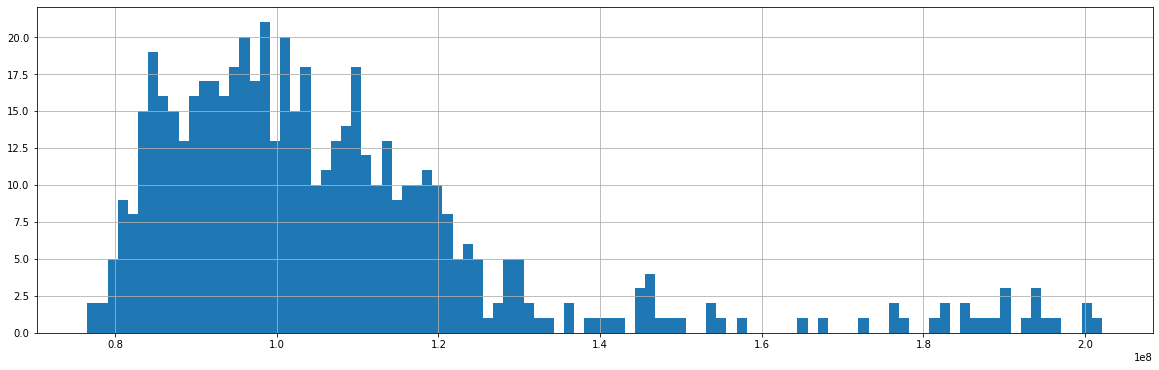

In [ ]:
df_en.Value.hist(bins=100).plot()

In [ ]:
#This Function will accesss the performance of our model
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3) *100)

In [ ]:
#lets divide english into train and test . for test we are only taking last 12 rows
train_x = df_en.loc[df_en.index < df_en.index[-12]].copy()
test_x =df_en.loc[df_en.index >= df_en.index[-12]].copy()

test_x

,Value
Date,
2016-12-20,128043832.0
2016-12-21,118888048.0
2016-12-22,120491575.0
2016-12-23,112905341.0
2016-12-24,119860923.0
2016-12-25,123926291.0
2016-12-26,139112120.0
2016-12-27,145628734.0
2016-12-28,141278366.0


In [ ]:
train_x['Value'][-1]

130939883.0

MAE : 22825494.171
RMSE : 25546916.783
MAPE: 17.0


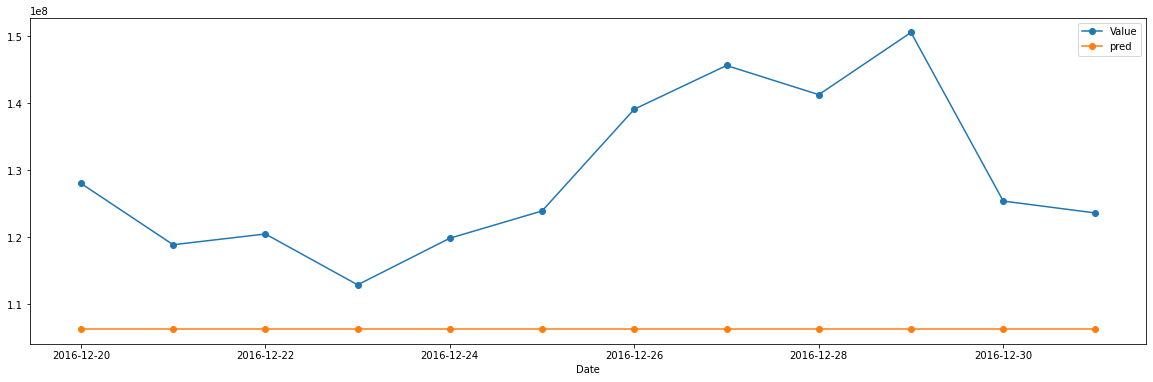

In [ ]:
## Global mean model
test_x['pred'] = train_x['Value'].mean()

test_x.plot(style='-o')
performance(test_x['Value'], test_x['pred'])

In [ ]:
## moving average

In [ ]:
#ltes chack whether our dataset is stationary or not
import statsmodels.api as sm
sm.tsa.stattools.adfuller(df_en.Value)[1]

0.18953171039920796

In [ ]:
#As value is greater than significance level of .05 so we failed to reject the null hypothesis that Model is not stationary
#to make it stationary lets use differncing and seasonal decompose

In [ ]:
#Lets make adf test function
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1]
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

adf_test(df_en.Value)

Sequence is not stationary


In [ ]:
#differincing it by 1 is making it stationary
adf_test(df_en.Value.diff(1).dropna())

Sequence is stationary


In [ ]:
#We see differencing by 1 is making datset stationary

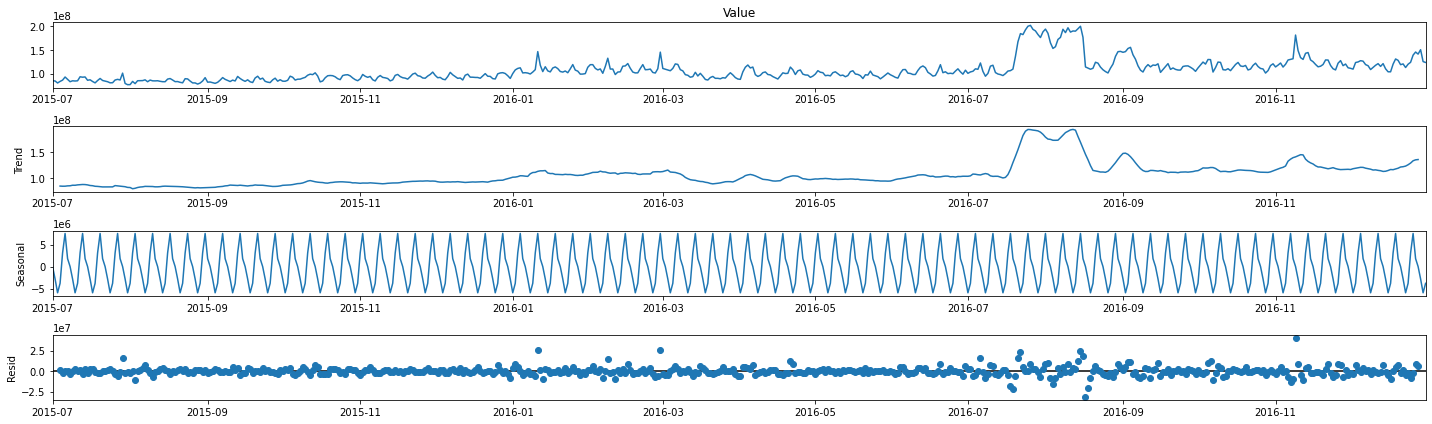

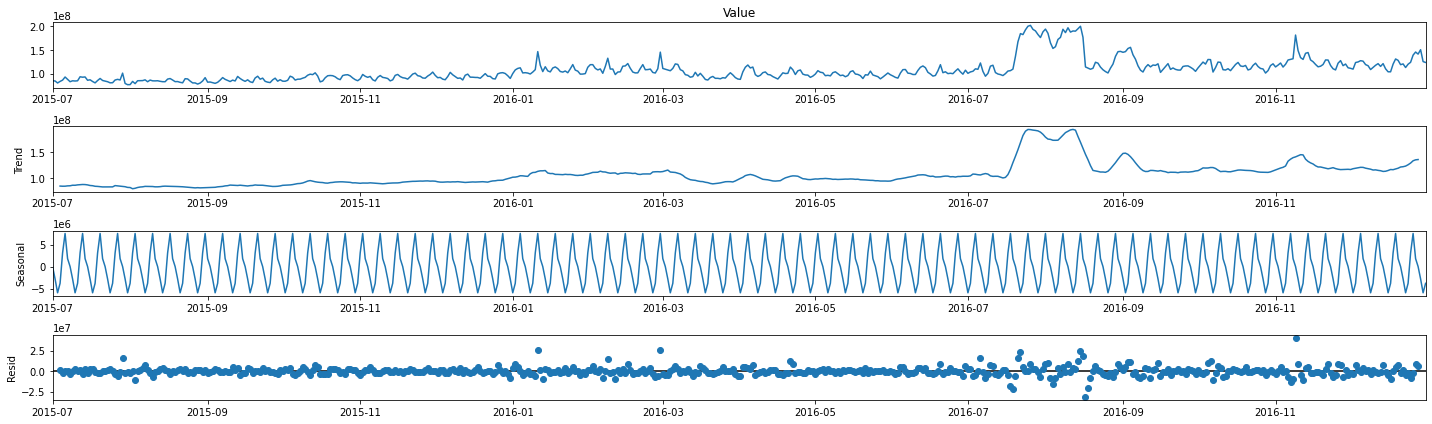

In [ ]:
#Now lets try additive seasonal decompose and plot seasonality trend and residual
df_en.index = pd.to_datetime(df_en.index)
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(df_en.Value, model='additive')
model.plot()

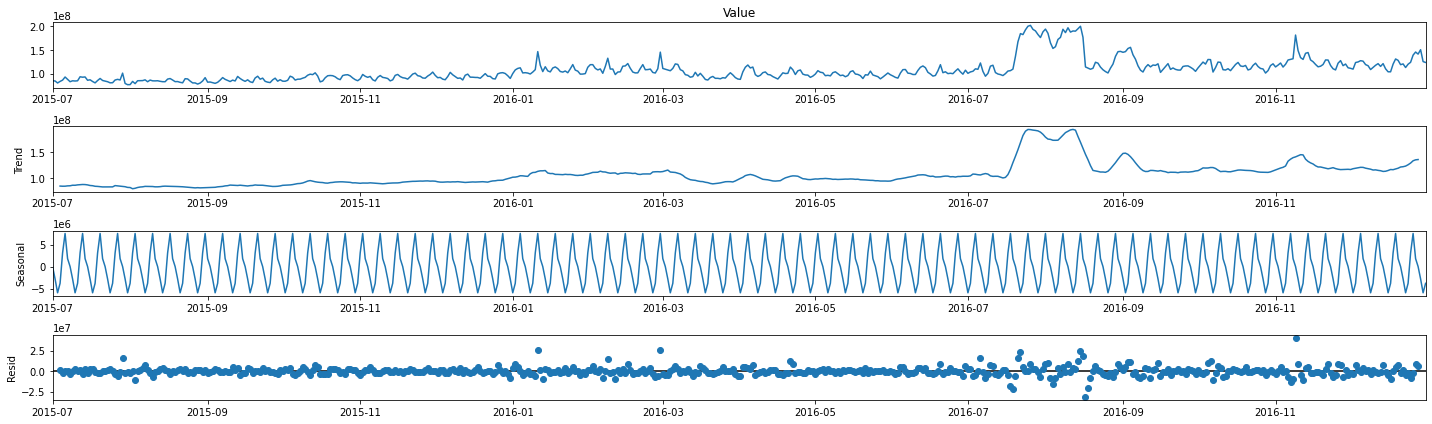

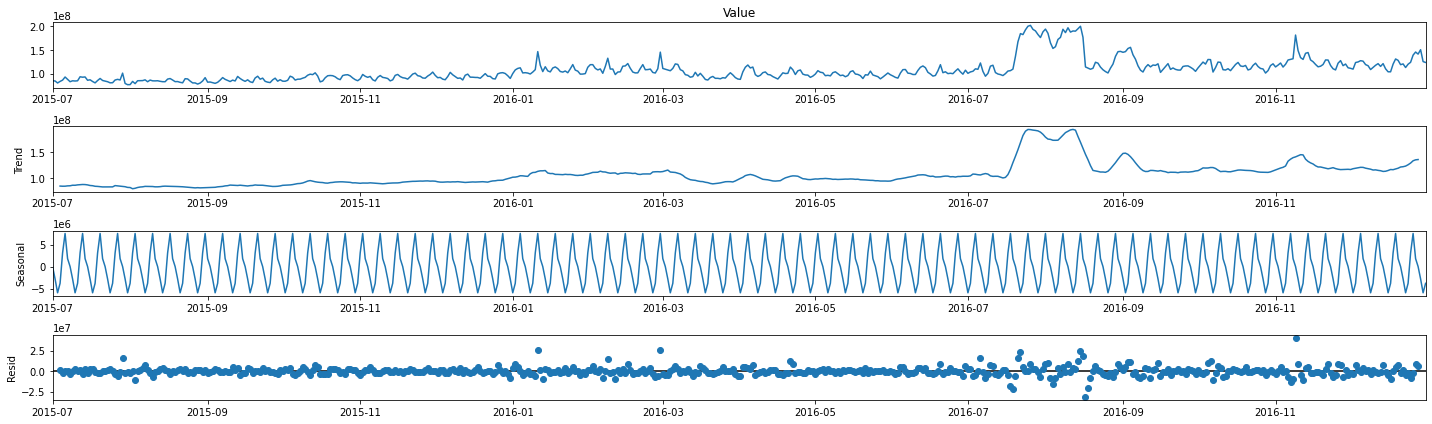

In [ ]:
#Now lets try multiplicative  seasonal decompose and plot seasonality trend and residual
df_en.index = pd.to_datetime(df_en.index)
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(df_en.Value, model='additive')
model.plot()

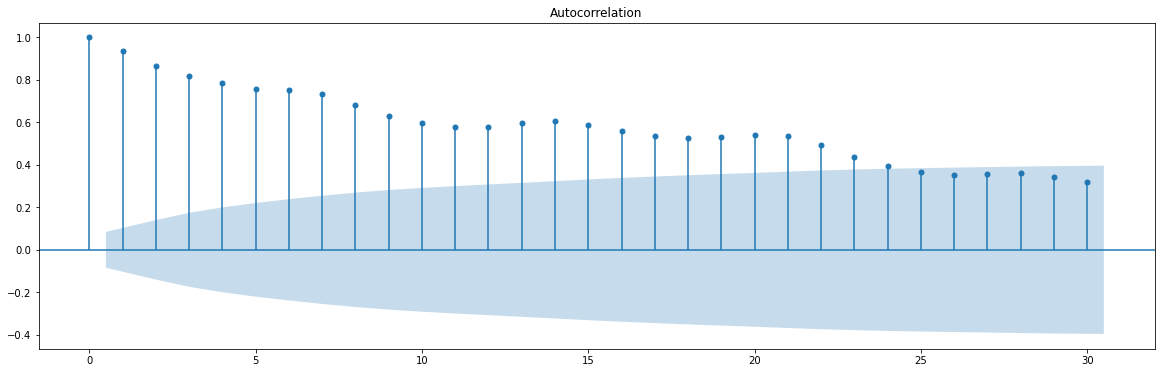

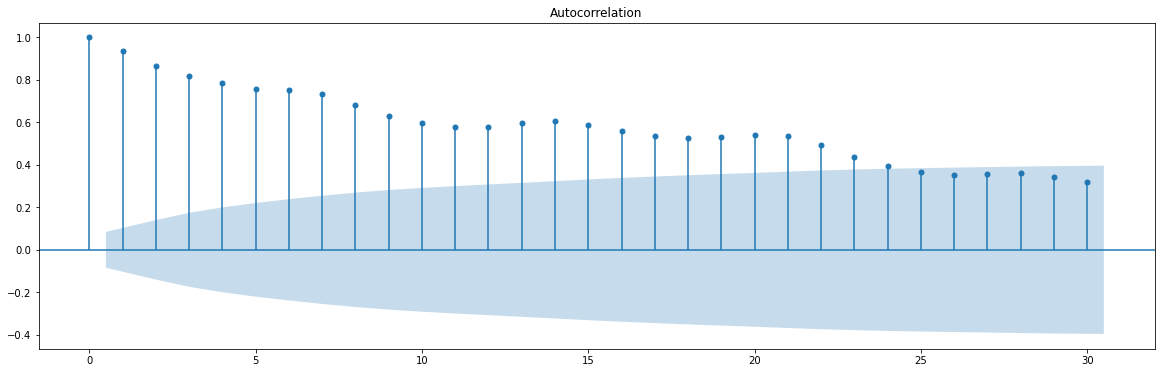

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_x.Value, lags=30)

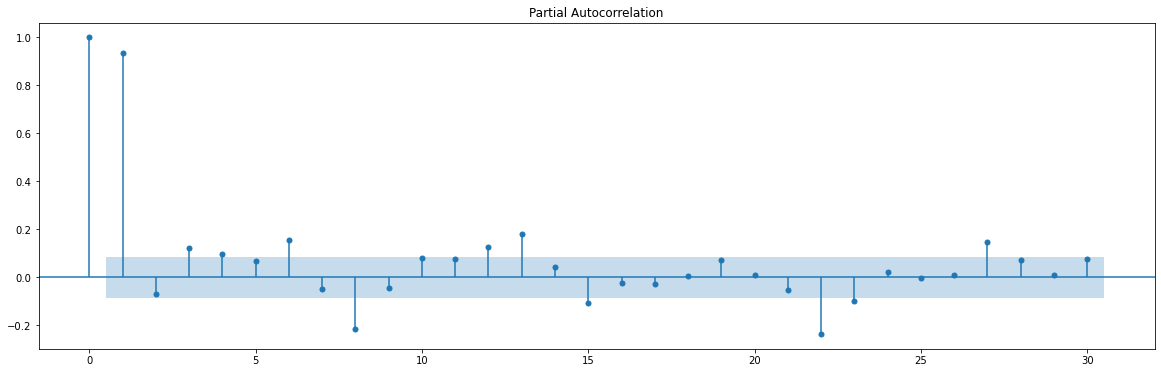

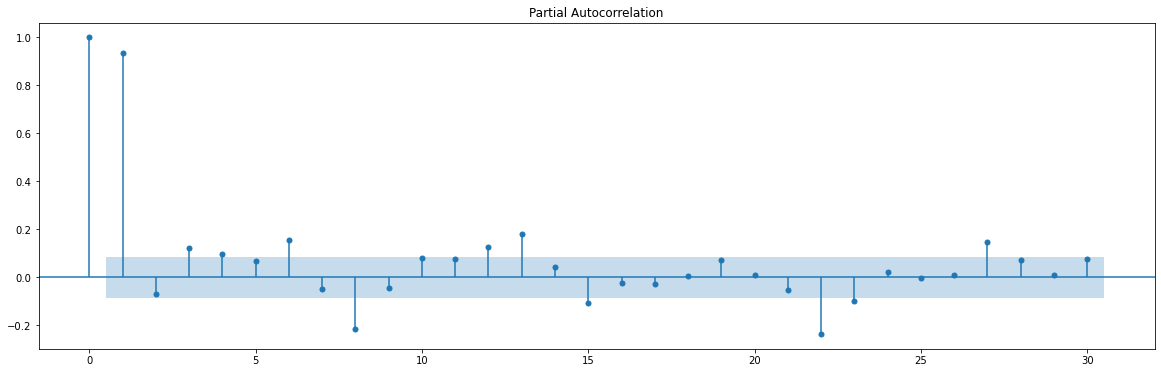

In [ ]:
plot_pacf(train_x.Value, lags=30)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
test_x.index = pd.to_datetime(test_x.index)

In [ ]:
import warnings;
warnings.simplefilter('ignore')

MAE : 6858397.478
RMSE : 9780649.99
MAPE: 5.0


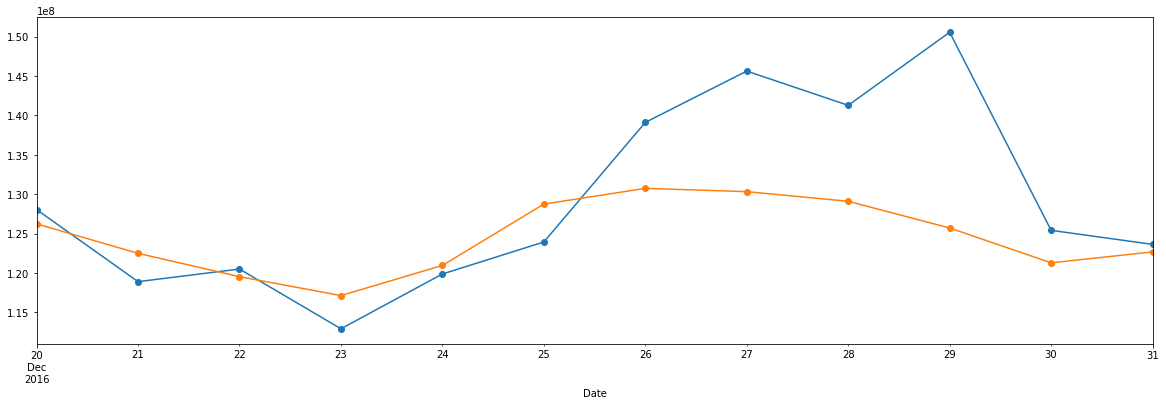

In [ ]:
#Arima
model = SARIMAX(train_x.Value, order=(12, 1, 15)) #(p, d, q)
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

test_x['Value'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Value'], test_x['pred'])

In [ ]:
model.aic

18541.86961881211

MAE : 8259556.296
RMSE : 11728339.76
MAPE: 6.0


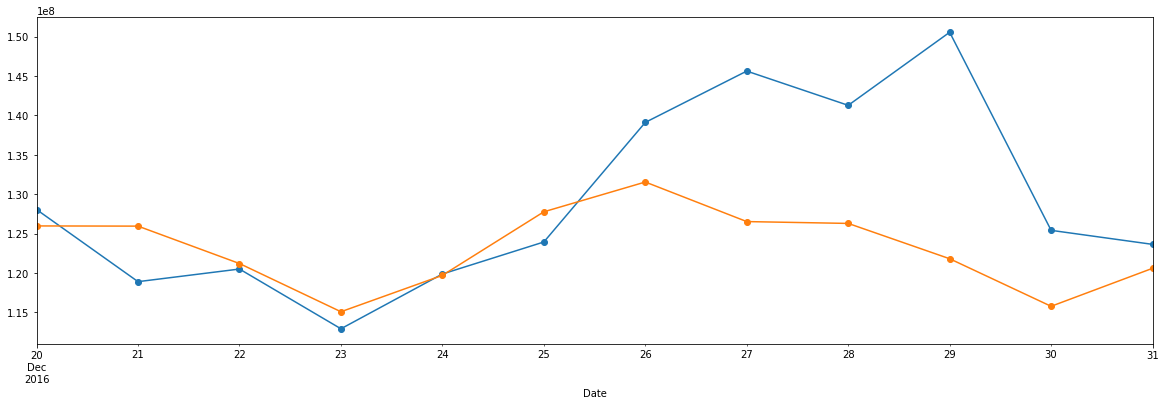

In [ ]:
#Adding seasonal order
model = SARIMAX(train_x['Value'], order=(2, 1, 2), seasonal_order=(1,1,1,7))
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

test_x['Value'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Value'], test_x['pred'])

In [ ]:
exog['in'] =df_en['Value'].index
exog.set_index('in', inplace=True)

In [ ]:
exog1 = exog[:-12]
exog1

,Exog
in,
2015-07-01,0
2015-07-02,0
2015-07-03,0
2015-07-04,0
2015-07-05,0
...,...
2016-12-15,0
2016-12-16,0
2016-12-17,0


In [ ]:
exog_forecast = exog[-12:]
exog_forecast

,Exog
in,
2016-12-20,0
2016-12-21,0
2016-12-22,0
2016-12-23,0
2016-12-24,0
2016-12-25,0
2016-12-26,0
2016-12-27,1
2016-12-28,1


In [ ]:
exog1 = exog1.set_index(train_x.index)

In [ ]:
exog1.index.dtype

dtype('O')

In [ ]:
train_x.index.dtype

dtype('O')

In [ ]:
exog_forecast = exog_forecast.loc[test_x.index]


In [ ]:
model = SARIMAX(train_x['Value'], exog=exog1, order=(2,1,2),seasonal_order=(1,1,1,7))
results = model.fit(disp=False)



In [ ]:
exog_forecast = exog[538:]
test_steps=12
#test_x['pred'] = results.predict(steps=12, exog=exog_forecast['Exog'])
test_x['pred'] = results.predict(start=len(train_x), end=len(train_x) + test_steps - 1, exog=exog_forecast['Exog'])
performance(test_x['Value'], test_x['pred'])



MAE : 4319225.554
RMSE : 5112646.733
MAPE: 3.3000000000000003


In [ ]:
from prophet import Prophet

In [ ]:

model = Prophet()
train_xx = train_x
train_xx.reset_index(inplace= True)
train_xx = train_x.rename(columns={'Date': 'ds', 'Value': 'y'})
train_xx['ds'] = pd.to_datetime(train_xx['ds'])

In [ ]:
exog1_xx= exog1
exog1_xx.reset_index(inplace= True)
train_xx['holiday'] = exog1_xx['Exog']

In [ ]:
train_xx.head()

,ds,y,holiday
0,2015-07-01,84712190.0,0
1,2015-07-02,84438545.0,0
2,2015-07-03,80167728.0,0
3,2015-07-04,83463204.0,0
4,2015-07-05,86198637.0,0


In [ ]:
from prophet import Prophet
import pandas as pd
plt.figure(figsize=(20,10))
m = Prophet()

m.fit(train_xx[['ds', 'y']])
future = m.make_future_dataframe(periods=12, freq='D')

09:00:28 - cmdstanpy - INFO - Chain [1] start processing
09:00:28 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1440x720 with 0 Axes>

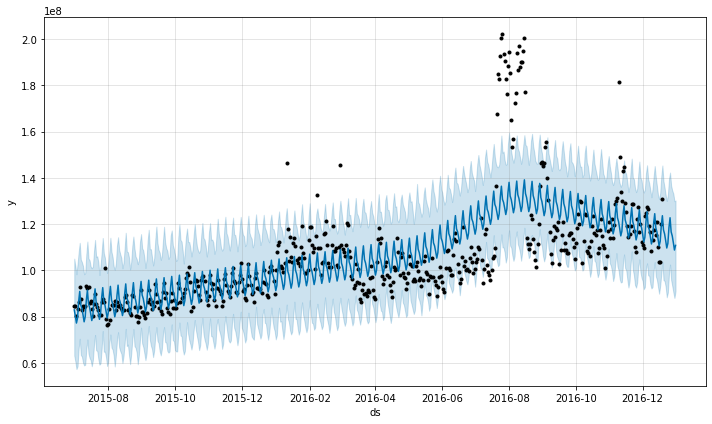

In [ ]:
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,8.296200e+07,6.317978e+07,1.050921e+08,8.296200e+07,8.296200e+07,-2.604843e+04,-2.604843e+04,-2.604843e+04,-2.604843e+04,-2.604843e+04,-2.604843e+04,0.0,0.0,0.0,8.293596e+07
1,2015-07-02,8.303893e+07,6.060061e+07,1.019084e+08,8.303893e+07,8.303893e+07,-2.790722e+06,-2.790722e+06,-2.790722e+06,-2.790722e+06,-2.790722e+06,-2.790722e+06,0.0,0.0,0.0,8.024821e+07
2,2015-07-03,8.311587e+07,5.737768e+07,9.831666e+07,8.311587e+07,8.311587e+07,-5.864058e+06,-5.864058e+06,-5.864058e+06,-5.864058e+06,-5.864058e+06,-5.864058e+06,0.0,0.0,0.0,7.725181e+07
3,2015-07-04,8.319280e+07,5.860446e+07,1.027635e+08,8.319280e+07,8.319280e+07,-3.739038e+06,-3.739038e+06,-3.739038e+06,-3.739038e+06,-3.739038e+06,-3.739038e+06,0.0,0.0,0.0,7.945376e+07
4,2015-07-05,8.326973e+07,6.622081e+07,1.078574e+08,8.326973e+07,8.326973e+07,3.238684e+06,3.238684e+06,3.238684e+06,3.238684e+06,3.238684e+06,3.238684e+06,0.0,0.0,0.0,8.650841e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,1.150385e+08,9.580546e+07,1.366303e+08,1.149902e+08,1.150644e+08,1.594495e+06,1.594495e+06,1.594495e+06,1.594495e+06,1.594495e+06,1.594495e+06,0.0,0.0,0.0,1.166330e+08
546,2016-12-28,1.149139e+08,9.328419e+07,1.345226e+08,1.148432e+08,1.149557e+08,-2.604843e+04,-2.604843e+04,-2.604843e+04,-2.604843e+04,-2.604843e+04,-2.604843e+04,0.0,0.0,0.0,1.148878e+08
547,2016-12-29,1.147892e+08,9.053890e+07,1.331542e+08,1.146974e+08,1.148510e+08,-2.790722e+06,-2.790722e+06,-2.790722e+06,-2.790722e+06,-2.790722e+06,-2.790722e+06,0.0,0.0,0.0,1.119985e+08
548,2016-12-30,1.146645e+08,8.809074e+07,1.298728e+08,1.145465e+08,1.147502e+08,-5.864058e+06,-5.864058e+06,-5.864058e+06,-5.864058e+06,-5.864058e+06,-5.864058e+06,0.0,0.0,0.0,1.088004e+08


In [ ]:
performance(test_x['Value'], forecast['yhat'].tail(12))

MAE : 14819985.085
RMSE : 18297090.616
MAPE: 10.9


In [ ]:
#perform hyper parameter tuning for sarimax

from itertools import product
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the range of values for the parameters to be tuned
p_values = [0, 1, 2]  # range of p values (order)
d_values = [1]  # range of d values
q_values = [0, 1,]  # range of q values (seasonal order)
P_values = [0, 1]  # range of P values (seasonal order)
D_values = [0, 1]  # range of D values (seasonal order)
Q_values = [ 7,30]  # range of Q values (seasonal order)

# Create a list of all possible parameter combinations
param_grid = product(p_values, d_values, q_values, P_values, D_values, Q_values)

best_model = None
best_aic = float('inf')  # Initialize with a high value

# Iterate over all parameter combinations and train models
for param in param_grid:
    p, d, q, P, D, Q = param
    model = SARIMAX(train_x['Value'],  order=(p, d, q) ,seasonal_order=(P, D, Q, 7))

    results = model.fit(disp=False)

    # Calculate AIC (Akaike Information Criterion) to evaluate the model
    aic = results.aic

    # Update the best model and AIC if needed
    if aic < best_aic:
        best_aic = aic
        best_model = results

# Use the best model to make predictions
test_x['pred'] = best_model.forecast(steps=12)


# Plot the results and calculate performance
test_x['Value'].plot(style='-o', label='Actual')
test_x['pred'].plot(style='-o', label='Predicted')
plt.legend()
plt.show()

# Calculate performance (you need to define this function)
performance(test_x['Value'], test_x['pred'])


KeyboardInterrupt: 

In [ ]:
#lets see what all language we have
df['Language'].value_counts()

en    13261050
ja    11237050
de    10200850
fr     9791100
zh     9475950
ru     8262100
es     7737950
Name: Language, dtype: int64

# en    24111
ja    20431
de    18547
fr    17802
zh    17229
ru    15022
es    14069
Name: Language, dtype: int64

In [ ]:
df_ja = result_df.loc['ja']
df_de = result_df.loc['de']
df_fr = result_df.loc['fr']
df_zh = result_df.loc['zh']
df_ru = result_df.loc['ru']
df_es = result_df.loc['es']

train_x_ja = df_ja.loc[df_ja.index < df_ja.index[-12]].copy()
test_x_ja =df_ja.loc[df_ja.index >= df_ja.index[-12]].copy()

train_x_de = df_de.loc[df_de.index < df_de.index[-12]].copy()
test_x_de =df_de.loc[df_de.index >= df_de.index[-12]].copy()

train_x_fr = df_fr.loc[df_fr.index < df_fr.index[-12]].copy()
test_x_fr =df_fr.loc[df_fr.index >= df_fr.index[-12]].copy()

train_x_zh = df_zh.loc[df_zh.index < df_zh.index[-12]].copy()
test_x_zh =df_zh.loc[df_zh.index >= df_zh.index[-12]].copy()

train_x_ru = df_ru.loc[df_ru.index < df_ru.index[-12]].copy()
test_x_ru =df_ru.loc[df_ru.index >= df_ru.index[-12]].copy()

train_x_es = df_es.loc[df_es.index < df_es.index[-12]].copy()
test_x_es =df_es.loc[df_es.index >= df_es.index[-12]].copy()


In [ ]:
df_ja.head(1)

,Value
Date,
2015-07-01,11863200.0


In [ ]:
df_ja.shape

(550, 1)

In [ ]:
train_x = df_ja.loc[df.index < df_ja.index[-12]].copy()
test_x = df_ja.loc[df.index >= df_ja.index[-12]].copy()

In [ ]:
exog1 = exog[:-12]
exog1 = exog1.set_index(train_x.index)
model = SARIMAX(train_x['Value'], exog=exog1, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)
exog1 = exog1.set_index(train_x.index)

In [ ]:
exog_forecast = exog[538:]  # Adjust this based on your data
test_steps = 12
test_x.index= pd.to_datetime(test_x.index)
test_x['pred'] = results.predict(start=len(train_x), end=len(train_x) + test_steps - 1, exog=exog_forecast['Exog'])

In [ ]:
new_dtype = np.dtype('O')
exog_forecast.index = exog_forecast.index.astype(new_dtype)

In [ ]:
(results.predict(start=len(train_x), end=len(train_x) + test_steps - 1, exog=exog_forecast['Exog'])).index

DatetimeIndex(['2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
               '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
test_x.index

DatetimeIndex(['2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
               '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
len(train_x)

538

In [ ]:
len(train_x) +11

549

In [ ]:
print(f"Performance for {language_name}:")
performance(test_x['Value'], test_x['pred'])

Performance for ja:
MAE : 2028828.027
RMSE : 3067159.199
MAPE: 10.4


In [ ]:
exog1.tail()

,Exog
Date,
2016-12-15,0
2016-12-16,0
2016-12-17,0
2016-12-18,0
2016-12-19,0


In [ ]:
train_x.tail()

,Value
Date,
2016-12-15,13997880.0
2016-12-16,13785515.0
2016-12-17,15685681.0
2016-12-18,19007555.0
2016-12-19,15992235.0


In [ ]:
language_dfs = [df_en , df_ja, df_de, df_fr, df_zh, df_ru, df_es]
language_names = ['en','ja', 'de', 'fr', 'zh', 'ru', 'es']
#language_dfs = [df_en , df_ja]
#language_names = ['en','ja']

# Iterate over each language
for i, df in enumerate(language_dfs):
    print(f'for language {language_names[i]} - {adf_test(df.Value)}')


#adf_test(df_en.Value.diff(1).dropna())



Sequence is not stationary
for language en - None
Sequence is not stationary
for language ja - None
Sequence is not stationary
for language de - None
Sequence is not stationary
for language fr - None
Sequence is not stationary
for language zh - None
Sequence is stationary
for language ru - None
Sequence is stationary
for language es - None


In [ ]:
#for zh ru and es Sequence is stationary
#for ja differencing by 1
adf_test(df_ja.Value.diff(1).dropna())

Sequence is stationary


In [ ]:
#for fr differencing by 1
adf_test(df_fr.Value.diff(1).dropna())

Sequence is stationary


In [ ]:
#for fr differencing by 1
adf_test(df_de.Value.diff(1).dropna())

Sequence is stationary


In [ ]:
#for rest three differencing by 1 do the job

plot for en
plot for ja
plot for de
plot for fr
plot for zh
plot for ru
plot for es


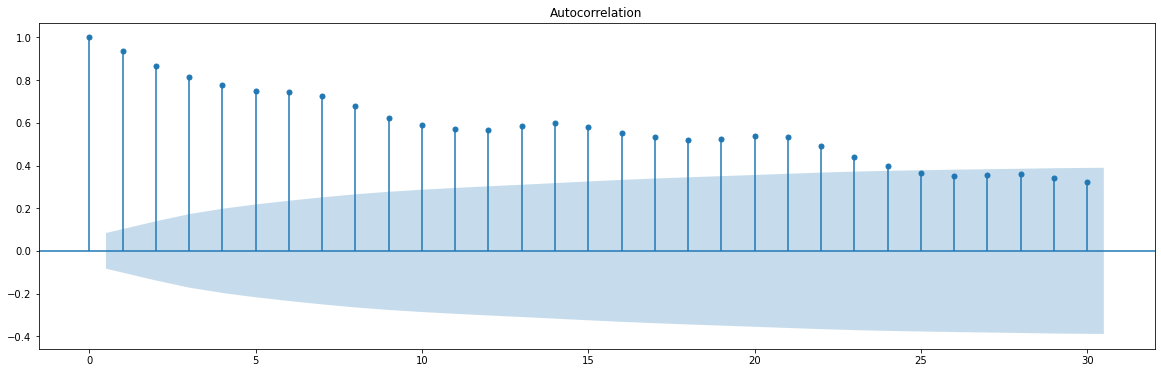

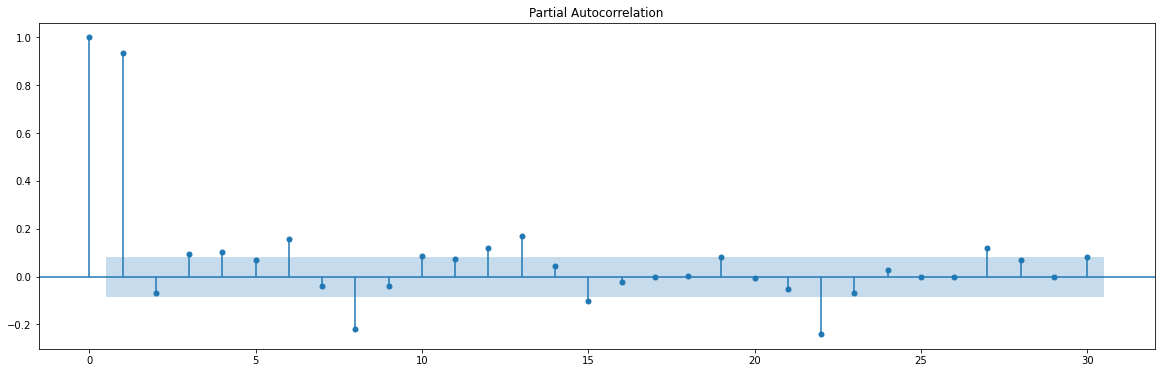

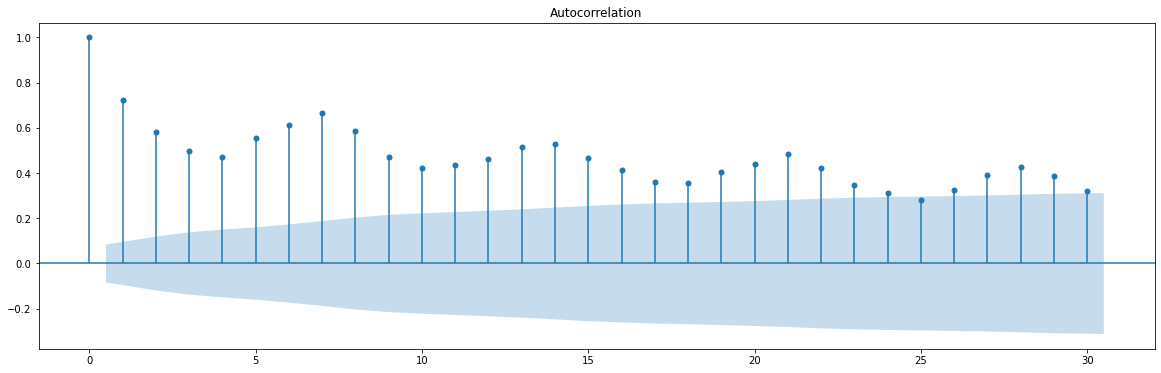

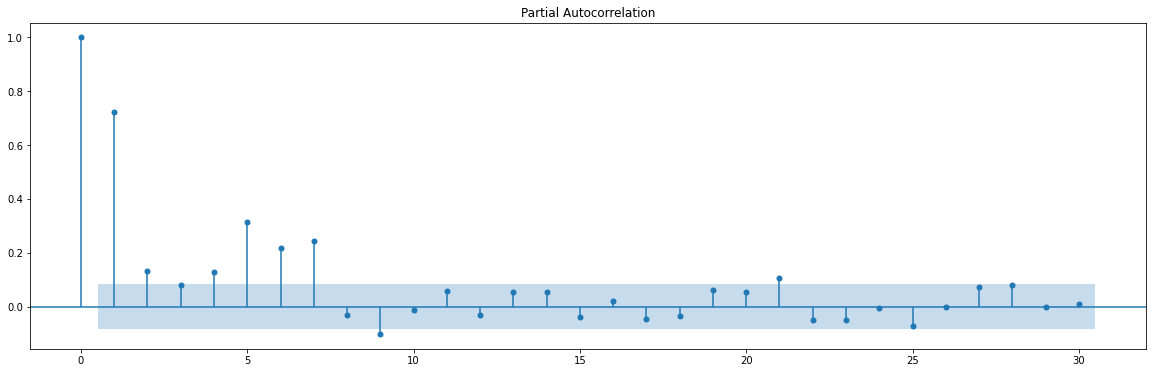

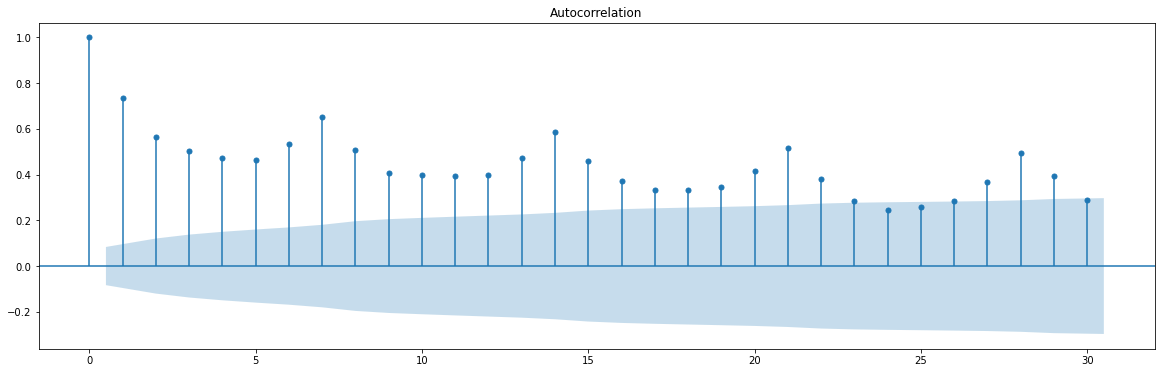

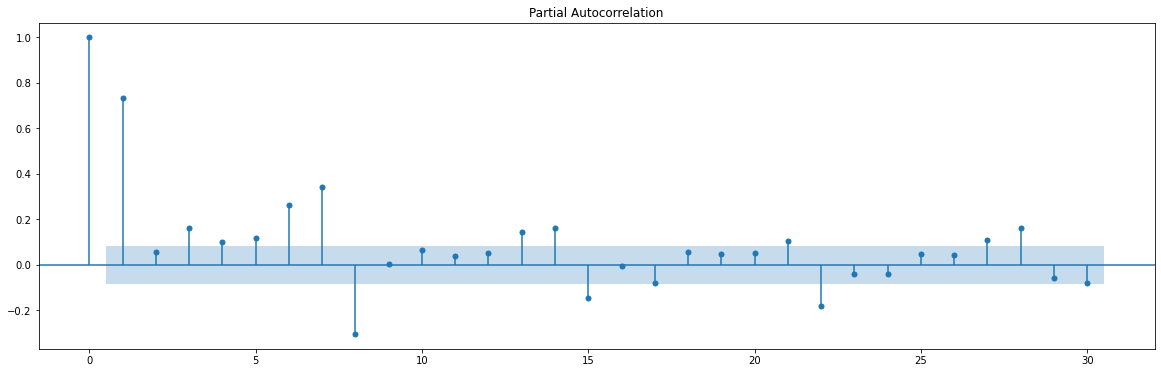

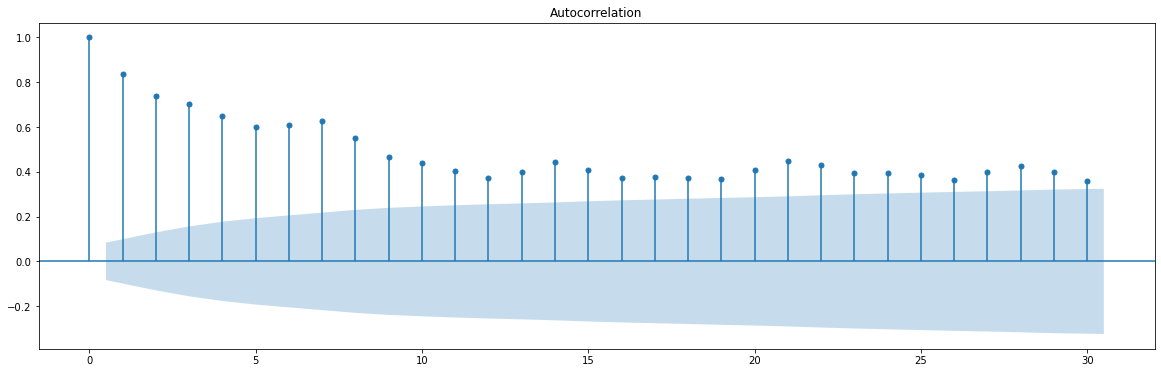

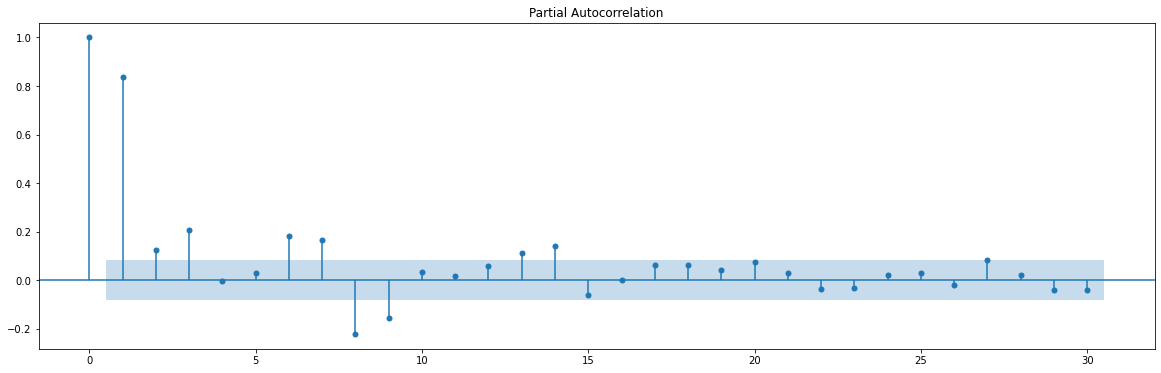

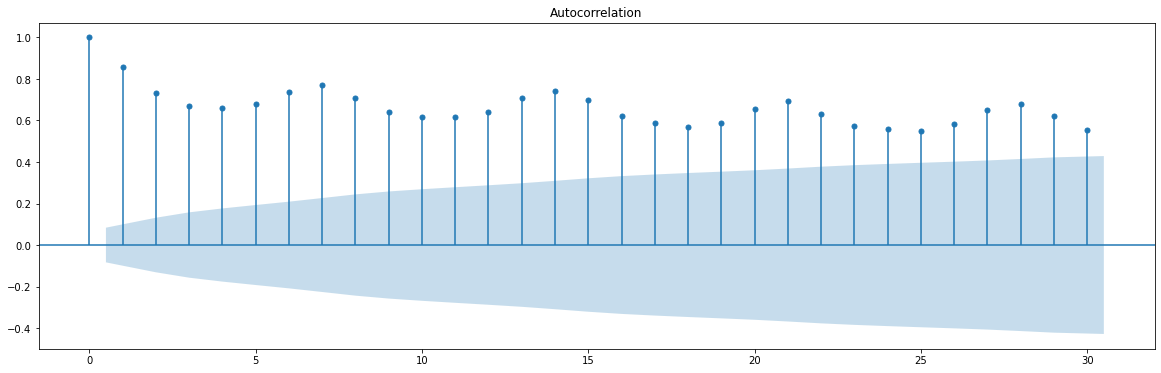

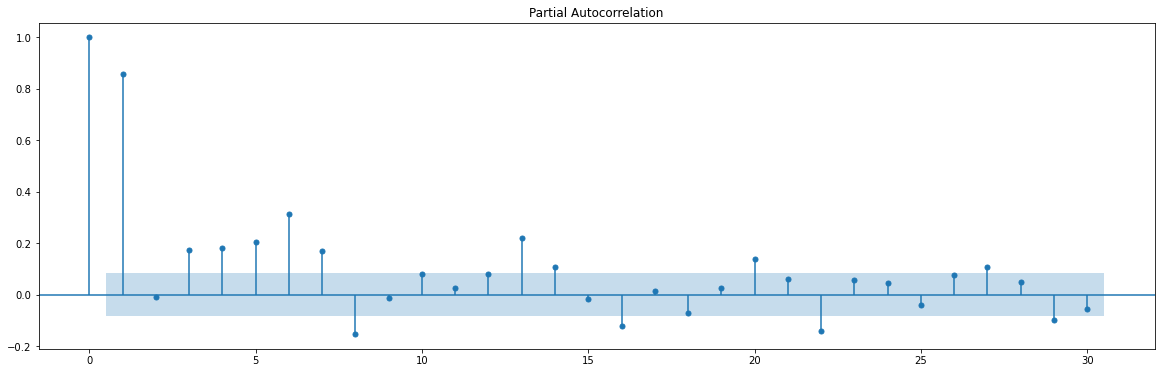

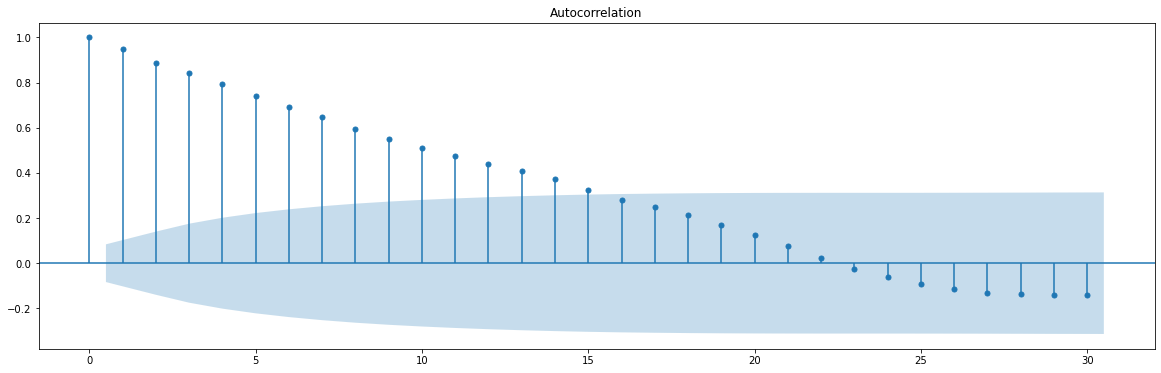

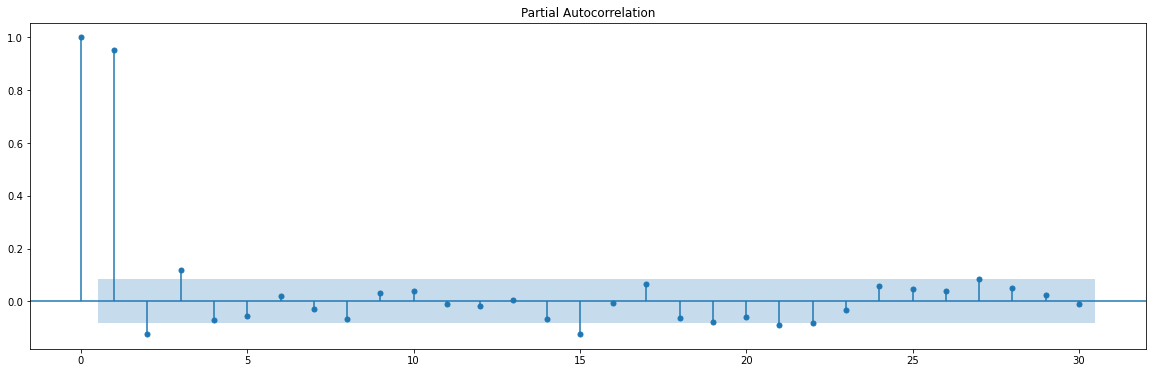

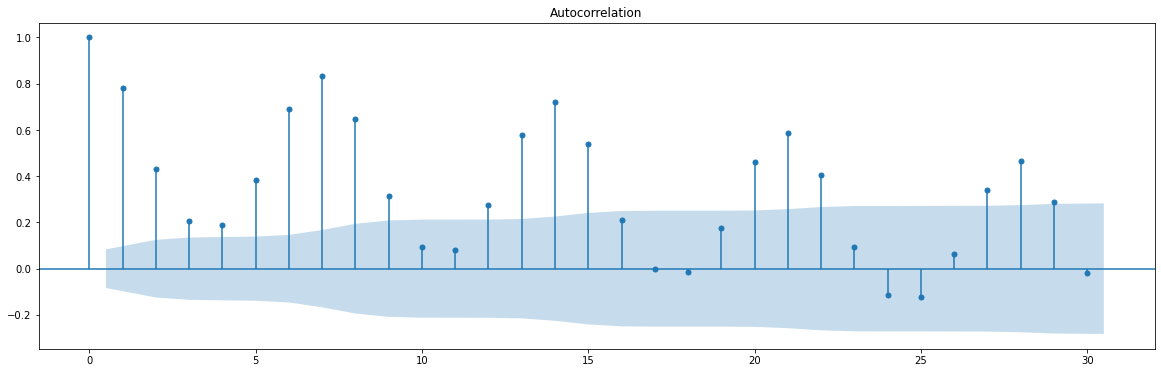

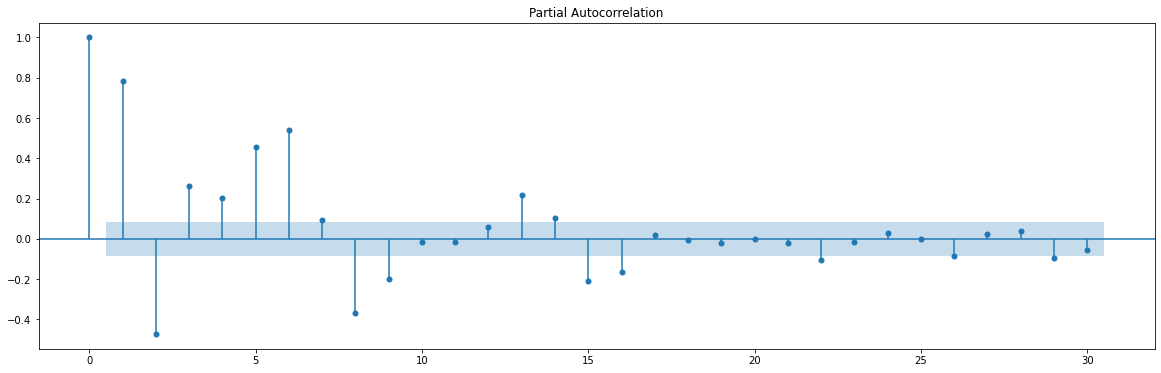

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for i, df in enumerate(language_dfs):
    print (f'plot for {language_names[i]}')
    plot_acf(df.Value, lags=30)
    plot_pacf(df.Value,lags =30)

# Decomposition of Series:

Decomposition is a statistical technique to break down a time series into its constituent components, typically trend, seasonality, and noise (residuals/error). This helps in understanding underlying patterns and variations in the data.
Level of Differencing for Stationary Series:

The appropriate level of differencing for achieving stationarity in a time series can be determined using methods like ACF, PACF plots, and statistical tests. Typically, the minimum differencing required to achieve a constant mean and variance is chosen.
Difference Between ARIMA, SARIMA, and SARIMAX:

ARIMA (Autoregressive Integrated Moving Average): A time series forecasting method that combines autoregressive and moving average components with differencing.
SARIMA (Seasonal ARIMA): Extends ARIMA to handle seasonality in addition to the usual components.
SARIMAX: Extends SARIMA by allowing for exogenous (external) variables in the model.
Comparing Views in Different Languages:

Comparing the number of views in different languages involves analyzing the page views for content in various languages. This analysis can reveal language-specific trends, popularity, and user engagement patterns.
Methods Other than Grid Search for Model Selection:

Random Search: Randomly samples combinations of hyperparameters, often more efficient than grid search.
Bayesian Optimization: Uses probabilistic models to predict the performance of different hyperparameter configurations.
Cross-Validation: Divides the dataset into training and validation sets to evaluate model performance across different parameter settings.
Genetic Algorithms: Evolutionary optimization techniques to search for the best hyperparameters.
For specific insights and inferences, referring to the actual dataset and visualizations is crucial.







# Using Sarimax differently for stationary and non stationary

In [ ]:

#for stationary sequence zh, ru and es
#language_dfs = [df_en , df_ja, df_de, df_fr, df_zh, df_ru, df_es]
#language_names = ['en','ja', 'de', 'fr', 'zh', 'ru', 'es']
language_dfs = [df_zh, df_ru, df_es ]
language_names = ['zh','ru','es']

# Iterate over each language
for i, df in enumerate(language_dfs):
    language_name = language_names[i]

    train_x = df.loc[df.index < df.index[-12]].copy()
    test_x = df.loc[df.index >= df.index[-12]].copy()
    train_x.index = pd.to_datetime(train_x.index)
    test_x.index = pd.to_datetime(test_x.index)
    # Assuming exog1 contains the relevant exogenous variables needed for the model
    # Adjust exog1 accordingly based on your actual data
    exog1 = exog[:-12]
    exog1 = exog1.set_index(train_x.index) # Replace with the appropriate exog1 for the language

    # Fit SARIMAX model
    model = SARIMAX(train_x['Value'], exog=exog1, order=(2, 0, 2), seasonal_order=(1, 1, 1, 7))
    results = model.fit(disp=False)

    # Forecast using the model
    exog_forecast = exog[538:]  # Adjust this based on your data
    exog_forecast.index = pd.to_datetime(exog_forecast.index)
    test_steps = 12
    test_x['pred'] = results.predict(start=len(train_x), end=len(train_x) + test_steps - 1, exog=exog_forecast['Exog'])

    # Print performance
    print(f"Performance for {language_name}:")
    performance(test_x['Value'], test_x['pred'])


Performance for zh:
MAE : 218909.89
RMSE : 241888.081
MAPE: 3.4000000000000004
Performance for ru:
MAE : 2606320.276
RMSE : 3882228.969
MAPE: 18.3
Performance for es:
MAE : 1167942.465
RMSE : 1314292.9
MAPE: 8.1


In [ ]:
#for stationary sequence zh, ru and es
#language_dfs = [df_en , df_ja, df_de, df_fr, df_zh, df_ru, df_es]
#language_names = ['en','ja', 'de', 'fr', 'zh', 'ru', 'es']
language_dfs = [df_ja, df_de, df_fr ]
language_names = ['ja','de','fr']

# Iterate over each language
for i, df in enumerate(language_dfs):
    language_name = language_names[i]

    train_x = df.loc[df.index < df.index[-12]].copy()
    test_x = df.loc[df.index >= df.index[-12]].copy()
    train_x.index = pd.to_datetime(train_x.index)
    test_x.index = pd.to_datetime(test_x.index)
    # Assuming exog1 contains the relevant exogenous variables needed for the model
    # Adjust exog1 accordingly based on your actual data
    exog1 = exog[:-12]
    exog1 = exog1.set_index(train_x.index) # Replace with the appropriate exog1 for the language

    # Fit SARIMAX model
    model = SARIMAX(train_x['Value'], exog=exog1, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7))
    results = model.fit(disp=False)

    # Forecast using the model
    exog_forecast = exog[538:]  # Adjust this based on your data
    exog_forecast.index = pd.to_datetime(exog_forecast.index)
    test_steps = 12
    test_x['pred'] = results.predict(start=len(train_x), end=len(train_x) + test_steps - 1, exog=exog_forecast['Exog'])

    # Print performance
    print(f"Performance for {language_name}:")
    performance(test_x['Value'], test_x['pred'])

Performance for ja:
MAE : 2028828.027
RMSE : 3067159.199
MAPE: 10.4
Performance for de:
MAE : 1609339.065
RMSE : 2250783.996
MAPE: 8.5
Performance for fr:
MAE : 1908903.919
RMSE : 2102822.901
MAPE: 15.6
